In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 로지스틱 회귀로 와인 분류하기

In [2]:
## 알콜 도수, 당도, PH 값에 따라 레드와인과 화이트와인 구분하기

In [6]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [10]:
wine.head()
# class 값이 0이면 레드, 1이면 화이트와인

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [14]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [16]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [24]:
train_input.shape

(5197, 3)

In [26]:
test_input.shape

(1300, 3)

In [32]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss = StandardScaler()

In [38]:
ss.fit(train_input)

StandardScaler()

In [40]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

In [46]:
lr.fit(train_scaled, train_target)

LogisticRegression()

In [48]:
lr.score(train_scaled, train_target)

0.7808350971714451

In [50]:
lr.score(test_scaled, test_target)

0.7776923076923077

In [52]:
print(lr.coef_, lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


#### 결정트리로 와인 분류하기

In [55]:
## 설명이 쉬운 모델

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dt = DecisionTreeClassifier(random_state = 42)

In [61]:
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [63]:
dt.score(train_scaled, train_target)

0.996921300750433

In [65]:
dt.score(test_scaled, test_target)

0.8592307692307692

In [67]:
from sklearn.tree import plot_tree

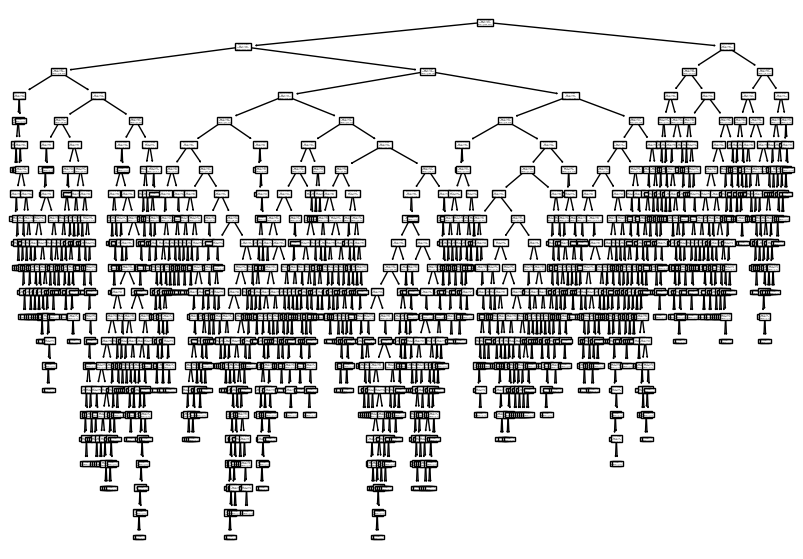

In [71]:
plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

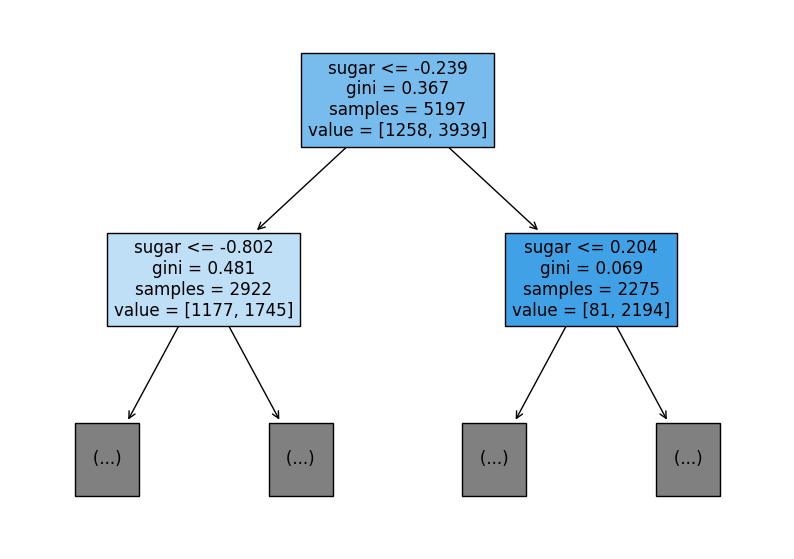

In [77]:
plt.figure(figsize = (10, 7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()
# max_depth = 트리의 깊이 제한 / 루트 노드를 제외하고 해당 개수의 노드 그려줌
# filled = 클래스에 맞게 노드의 색 칠함 / 어떤 클래스의 비율이 높아지면 점점 진한색으로 표시
# feature_names = 특성의 이름 전달

In [83]:
# 결정트리는 불순도를 기준으로 사용해 정보 이득이 최대가 되도록 노드를 분할한다.
# 마지막에 도달한 노드의 클래스 비율에 따라 예측을 만든다
# 과적합 방지를 위해서 가지치기 -> 트리의 최대 깊이 지정

In [85]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [87]:
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [91]:
dt.score(train_scaled, train_target)

0.8454877814123533

In [95]:
dt.score(test_scaled, test_target)

0.8415384615384616

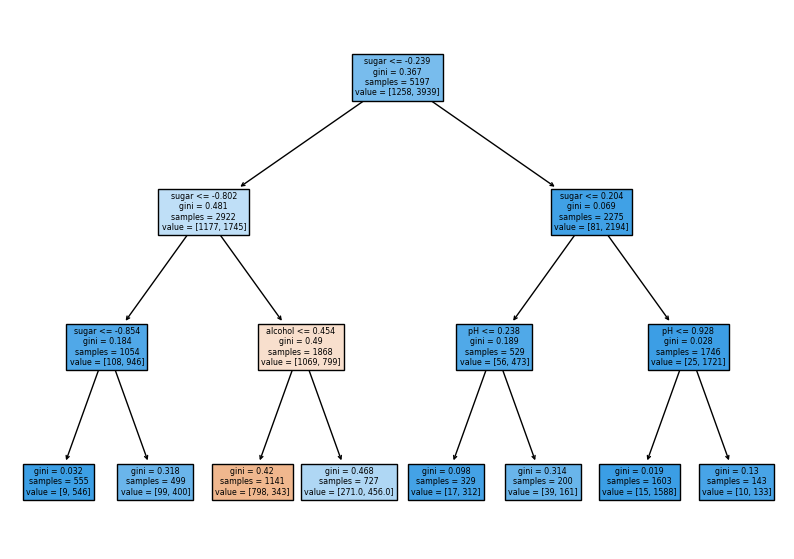

In [97]:
plt.figure(figsize = (10, 7))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [99]:
# dt는 특성 scale이 필요 없음
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [101]:
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [103]:
dt.score(train_input, train_target)

0.8454877814123533

In [105]:
dt.score(test_input, test_target)

0.8415384615384616

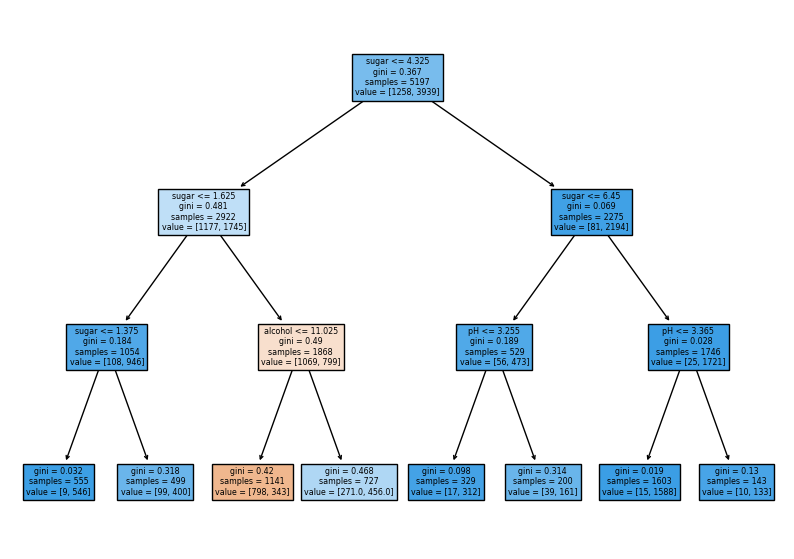

In [107]:
plt.figure(figsize = (10, 7))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [109]:
# 특성 중요도
dt.feature_importances_

array([0.12345626, 0.86862934, 0.0079144 ])